# Multiple MLP Architectures using Keras on MNIST

# Objective :-

1)  Try out different MLP architectures(2,3,5 layers) on the mnist dataset .

2) Build the model using Keras 

3) use batch normalization as well as drop-out in the NN

4) Use the adam optimizer and relu as the activiation funcation 

5) plot the train and test loss with each epoch with dynamic plotting

6) plot the weight using violini plot

In [1]:
import os
os.getcwd()

'C:\\Users\\Nicky\\Desktop\\my work\\Deep learning'

# Import Important libaries

In [3]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.models import Sequential 
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt
import numpy as np
import time

# Define some function

In [6]:
%matplotlib notebook
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(fig,x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [7]:
def training(model):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, 
                             verbose=1, validation_data=(X_test, Y_test))
    
    return history
    

In [8]:
def train_test_epoch_plot(model,history):
    score = model.evaluate(X_test, Y_test, verbose=0) 
    print('Test score:', score[0]) 
    print('Test accuracy:', score[1])
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
    # list of epoch numbers
    x = list(range(1,nb_epoch+1))
    # print(history.history.keys())
    # dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
    # history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
    # we will get val_loss and val_acc only when you pass the paramter validation_data
    # val_loss : validation loss
    # val_acc : validation accuracy
    # loss : training loss
    # acc : train accuracy
    # for each key in histrory.histrory we will have a list of length equal to number of epochs
    vy = history.history['val_loss']
    ty = history.history['loss']
    plt_dynamic(fig,x, vy, ty, ax)

In [9]:
def weight_plot(model,layeres):
    if layeres == 2:
        w_after = model.get_weights()
        h1_w = w_after[0].flatten().reshape(-1,1)
        h2_w = w_after[2].flatten().reshape(-1,1)
        out_w = w_after[4].flatten().reshape(-1,1)
        fig = plt.figure()
        plt.title("Weight matrices after model trained")
        plt.subplot(1, 3, 1)
        plt.title("Trained Weights")
        ax = sns.violinplot(y=h1_w,color='b')
        plt.xlabel('Hidden Layer 1')
        plt.subplot(1, 3, 2)
        plt.title("Trained Weights")
        ax = sns.violinplot(y=h2_w, color='r')
        plt.xlabel('Hidden Layer 2 ')
        plt.subplot(1, 3, 3)
        plt.title("Trained Weights")
        ax = sns.violinplot(y=out_w,color='y')
        plt.xlabel('Output Layer ')
        plt.show()
    elif layeres == 3:
        w_after = model.get_weights()
        h1_w = w_after[0].flatten().reshape(-1,1)
        h2_w = w_after[2].flatten().reshape(-1,1)
        h3_w = w_after[4].flatten().reshape(-1,1)
        out_w = w_after[6].flatten().reshape(-1,1)
        fig = plt.figure()
        plt.title("Weight matrices after model trained")
        plt.subplot(1, 4, 1)
        plt.title("Trained Wt")
        ax = sns.violinplot(y=h1_w,color='b')
        plt.xlabel('Hidden Layer 1')
        plt.subplot(1, 4, 2)
        plt.title("Trained Wt")
        ax = sns.violinplot(y=h2_w, color='r')
        plt.xlabel('Hidden Layer 2 ')
        plt.subplot(1, 4, 3)
        plt.title("Trained Wt")
        ax = sns.violinplot(y=h3_w, color='g')
        plt.xlabel('Hidden Layer 3 ')
        plt.subplot(1, 4, 4)
        plt.title("Trained Wt")
        ax = sns.violinplot(y=out_w,color='m')
        plt.xlabel('Output Layer ')
        plt.show()
    elif layeres == 5:
        w_after = model.get_weights()
        h1_w = w_after[0].flatten().reshape(-1,1)
        h2_w = w_after[2].flatten().reshape(-1,1)
        h3_w = w_after[4].flatten().reshape(-1,1)
        h4_w = w_after[6].flatten().reshape(-1,1)
        h5_w = w_after[8].flatten().reshape(-1,1)
        out_w = w_after[10].flatten().reshape(-1,1)
        fig = plt.figure()
        plt.title("Weight matrices after model trained")
        plt.subplot(1, 6, 1)
        plt.title("Weights")
        ax = sns.violinplot(y=h1_w,color='b')
        plt.xlabel('Hidden 1')
        plt.subplot(1, 6, 2)
        plt.title("Weights")
        ax = sns.violinplot(y=h2_w, color='r')
        plt.xlabel('Hidden 2 ')
        plt.subplot(1, 6, 3)
        plt.title("Weights")
        ax = sns.violinplot(y=h3_w, color='g')
        plt.xlabel('Hidden 3 ')
        plt.subplot(1, 6, 4)
        plt.title("Weights")
        ax = sns.violinplot(y=h4_w, color='c')
        plt.xlabel('Hidden 4 ')
        plt.subplot(1, 6, 5)
        plt.title("Weights")
        ax = sns.violinplot(y=h5_w, color='m')
        plt.xlabel('Hidden 5 ')
        plt.subplot(1, 6, 6)
        plt.title("Weights")
        ax = sns.violinplot(y=out_w,color='y')
        plt.xlabel('Out Layer')
        plt.show()
    

# Data loading and Pre-poccessing

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [11]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [12]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [13]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [14]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [15]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [16]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Intialization of Parameter:-

In [17]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [18]:
relu_model = Sequential()

# 2-Layered MLP

Input(784)-ReLu(512)-ReLu(128)-Softmax(output)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.2307 - acc: 0.9318 - val_loss: 0.1105 - val_acc: 0.9651
Epoch 2/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.0854 - acc: 0.9737 - val_loss: 0.0793 - val_acc: 0.9743
Epoch 3/20
60000/60000 [==============================] - 8s 141us/st

<IPython.core.display.Javascript object>


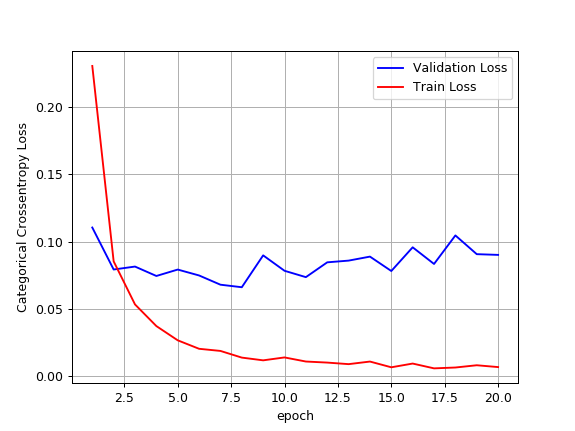

<IPython.core.display.Javascript object>


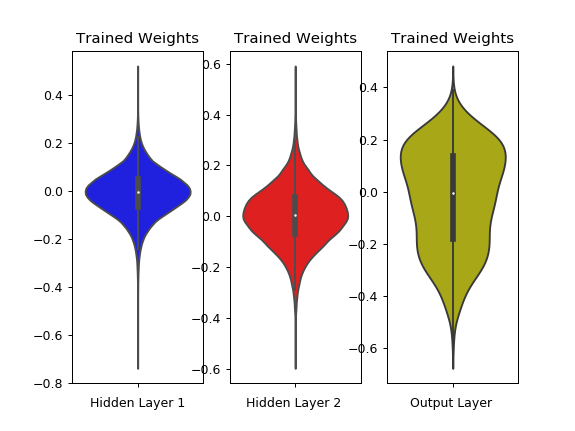

In [19]:
relu_model.add(Dense(512, activation='relu', 
                    input_shape=(input_dim,), kernel_initializer='he_normal'))
relu_model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
relu_model.add(Dense(output_dim, activation='softmax'))

print(relu_model.summary())

history = training(model=relu_model)
train_test_epoch_plot(model=relu_model, history=history)
weight_plot(model=relu_model,layeres=2)

# 2-Layered MLP with Batch-Normalization on hidden Layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 184us/step - lo

<IPython.core.display.Javascript object>


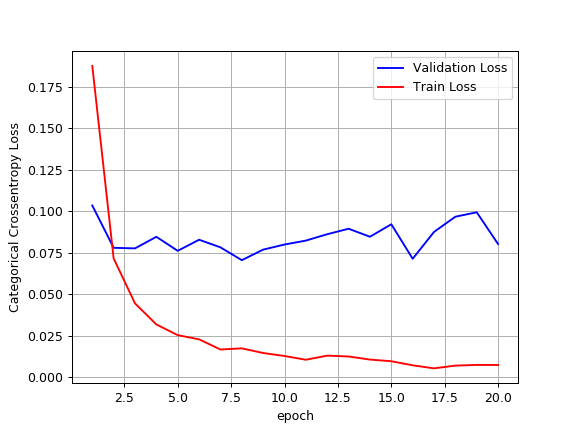

<IPython.core.display.Javascript object>


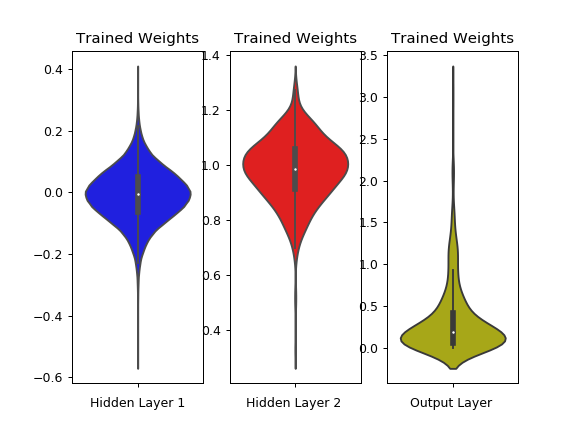

In [20]:
from keras.layers.normalization import BatchNormalization

batch = Sequential()
batch.add(Dense(512, activation='relu', 
                    input_shape=(input_dim,), kernel_initializer='he_normal'))
batch.add(BatchNormalization())
batch.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
batch.add(BatchNormalization())
batch.add(Dense(output_dim, activation='softmax'))

print(batch.summary())

history = training(model=batch)
train_test_epoch_plot(model=batch, history=history)
weight_plot(model=batch,layeres=2)

# 2-Layered MLP with Batch-Normalization and droupout on hidden Layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total para

<IPython.core.display.Javascript object>


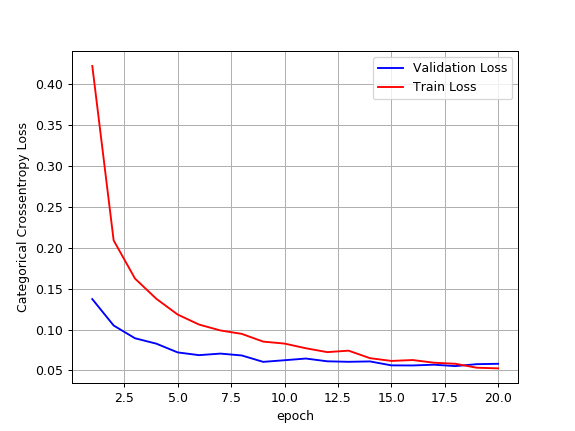

<IPython.core.display.Javascript object>


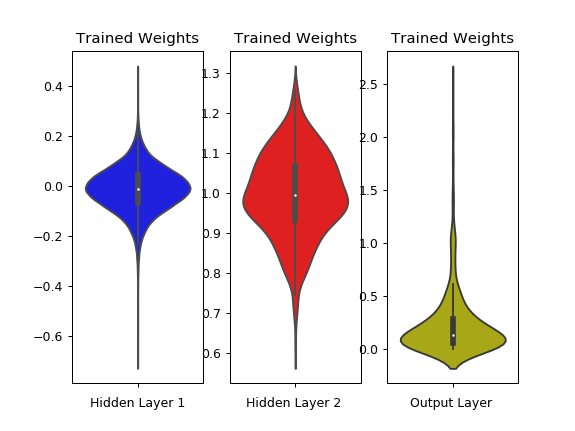

In [21]:
from keras.layers import Dropout
batch_dropout = Sequential()
batch_dropout.add(Dense(512, activation='relu', 
                    input_shape=(input_dim,), kernel_initializer='he_normal'))
batch_dropout.add(BatchNormalization())
batch_dropout.add(Dropout(0.5))
batch_dropout.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
batch_dropout.add(BatchNormalization())
batch_dropout.add(Dropout(0.5))
batch_dropout.add(Dense(output_dim, activation='softmax'))

print(batch_dropout.summary())

history = training(model=batch_dropout)
train_test_epoch_plot(model=batch_dropout, history=history)
weight_plot(model=batch_dropout,layeres=2)

# 3-Layered MLP

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 550)               431750    
_________________________________________________________________
dense_15 (Dense)             (None, 350)               192850    
_________________________________________________________________
dense_16 (Dense)             (None, 150)               52650     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1510      
Total params: 678,760
Trainable params: 678,760
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 196us/step - loss: 0.2141 - acc: 0.9364 - val_loss: 0.0960 - val_acc: 0.9714
Epoch 2/20
60000/60000 [==============================] - 12s 193us/step -

<IPython.core.display.Javascript object>


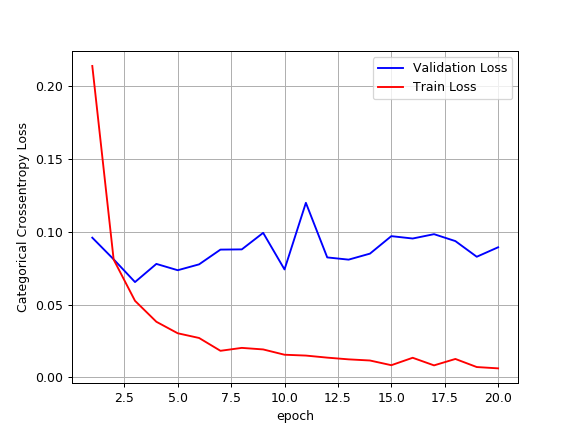

<IPython.core.display.Javascript object>


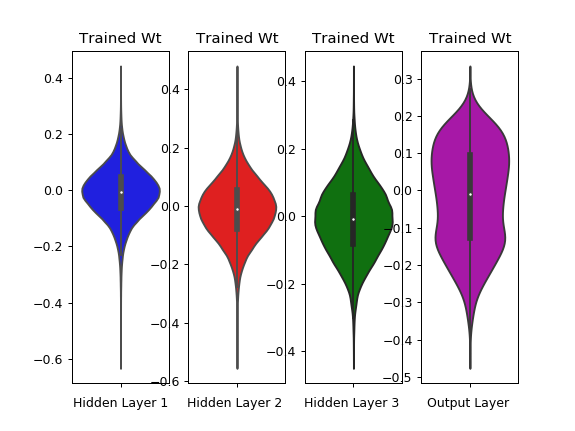

In [23]:
model3 = Sequential()
model3.add(Dense(550, activation='relu', 
                    input_shape=(input_dim,), kernel_initializer='he_normal'))
model3.add(Dense(350, activation='relu', kernel_initializer='he_normal'))
model3.add(Dense(150, activation='relu', kernel_initializer='he_normal'))
model3.add(Dense(output_dim, activation='softmax'))

print(model3.summary())

history = training(model=model3)
train_test_epoch_plot(model=model3, history=history)
weight_plot(model=model3,layeres=3)

# 3-Layered MLP with Batch-Normalization on hidden Layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 550)               431750    
_________________________________________________________________
batch_normalization_5 (Batch (None, 550)               2200      
_________________________________________________________________
dense_19 (Dense)             (None, 350)               192850    
_________________________________________________________________
batch_normalization_6 (Batch (None, 350)               1400      
_________________________________________________________________
dense_20 (Dense)             (None, 150)               52650     
_________________________________________________________________
batch_normalization_7 (Batch (None, 150)               600       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1510      
Total para

<IPython.core.display.Javascript object>


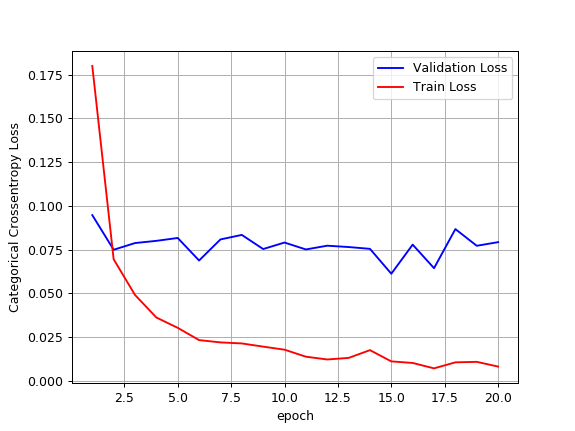

<IPython.core.display.Javascript object>


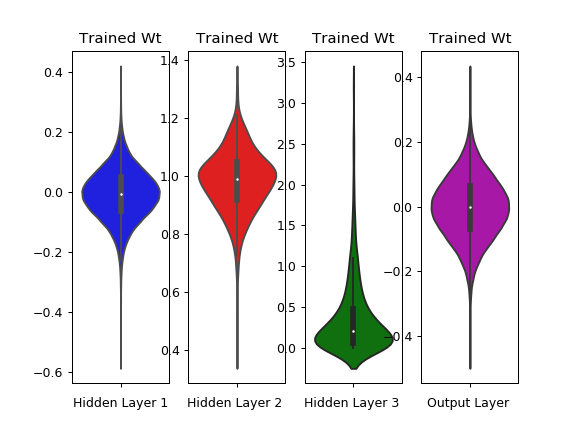

In [24]:
model3_batch = Sequential()
model3_batch.add(Dense(550, activation='relu', 
                    input_shape=(input_dim,), kernel_initializer='he_normal'))
model3_batch.add(BatchNormalization())
model3_batch.add(Dense(350, activation='relu', kernel_initializer='he_normal'))
model3_batch.add(BatchNormalization())
model3_batch.add(Dense(150, activation='relu', kernel_initializer='he_normal'))
model3_batch.add(BatchNormalization())
model3_batch.add(Dense(output_dim, activation='softmax'))

print(model3_batch.summary())

history = training(model=model3_batch)
train_test_epoch_plot(model=model3_batch, history=history)
weight_plot(model=model3_batch,layeres=3)

# 3-Layered MLP with Batch-Normalization and dropout on hidden Layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 550)               431750    
_________________________________________________________________
batch_normalization_8 (Batch (None, 550)               2200      
_________________________________________________________________
dropout_3 (Dropout)          (None, 550)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 350)               192850    
_________________________________________________________________
batch_normalization_9 (Batch (None, 350)               1400      
_________________________________________________________________
dropout_4 (Dropout)          (None, 350)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 150)               52650     
__________

<IPython.core.display.Javascript object>


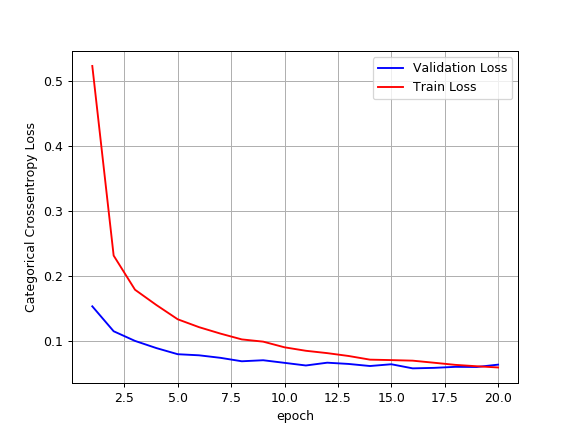

<IPython.core.display.Javascript object>


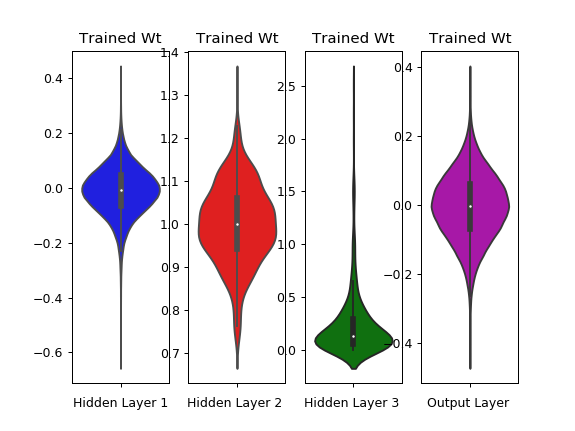

In [25]:
model3_batch_drop = Sequential()
model3_batch_drop.add(Dense(550, activation='relu', 
                    input_shape=(input_dim,), kernel_initializer='he_normal'))
model3_batch_drop.add(BatchNormalization())
model3_batch_drop.add(Dropout(0.5))
model3_batch_drop.add(Dense(350, activation='relu', kernel_initializer='he_normal'))
model3_batch_drop.add(BatchNormalization())
model3_batch_drop.add(Dropout(0.5))
model3_batch_drop.add(Dense(150, activation='relu', kernel_initializer='he_normal'))
model3_batch_drop.add(BatchNormalization())
model3_batch_drop.add(Dropout(0.5))
model3_batch_drop.add(Dense(output_dim, activation='softmax'))

print(model3_batch_drop.summary())

history = training(model=model3_batch_drop)
train_test_epoch_plot(model=model3_batch_drop, history=history)
weight_plot(model=model3_batch_drop,layeres=3)

# 5-Layered MLP

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 650)               510250    
_________________________________________________________________
dense_27 (Dense)             (None, 500)               325500    
_________________________________________________________________
dense_28 (Dense)             (None, 350)               175350    
_________________________________________________________________
dense_29 (Dense)             (None, 200)               70200     
_________________________________________________________________
dense_30 (Dense)             (None, 50)                10050     
_________________________________________________________________
dense_31 (Dense)             (None, 10)                510       
Total params: 1,091,860
Trainable params: 1,091,860
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>


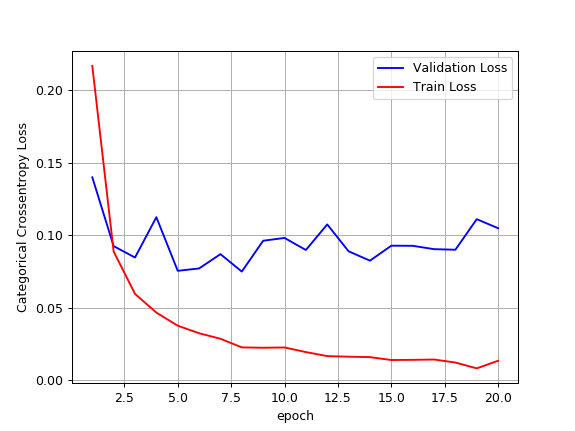

<IPython.core.display.Javascript object>


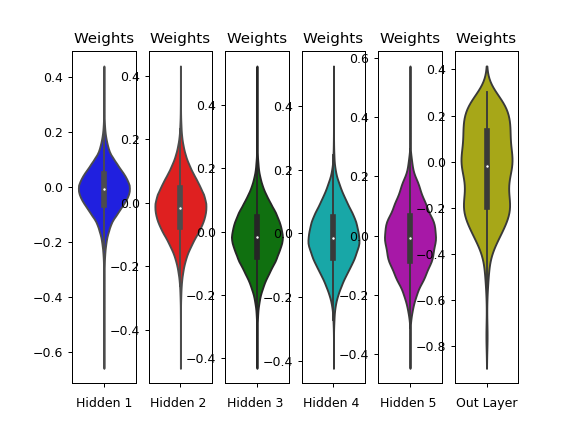

In [26]:
model5 = Sequential()
model5.add(Dense(650, activation='relu', 
                    input_shape=(input_dim,), kernel_initializer='he_normal'))
model5.add(Dense(500, activation='relu', kernel_initializer='he_normal'))
model5.add(Dense(350, activation='relu', kernel_initializer='he_normal'))
model5.add(Dense(200, activation='relu', kernel_initializer='he_normal'))
model5.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model5.add(Dense(output_dim, activation='softmax'))

print(model5.summary())

history = training(model=model5)
train_test_epoch_plot(model=model5, history=history)
weight_plot(model=model5,layeres=5)

# 5-Layered MLP with Batch-Normalization on hidden Layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 650)               510250    
_________________________________________________________________
batch_normalization_16 (Batc (None, 650)               2600      
_________________________________________________________________
dense_39 (Dense)             (None, 500)               325500    
_________________________________________________________________
batch_normalization_17 (Batc (None, 500)               2000      
_________________________________________________________________
dense_40 (Dense)             (None, 350)               175350    
_________________________________________________________________
batch_normalization_18 (Batc (None, 350)               1400      
_________________________________________________________________
dense_41 (Dense)             (None, 200)               70200     
__________

<IPython.core.display.Javascript object>


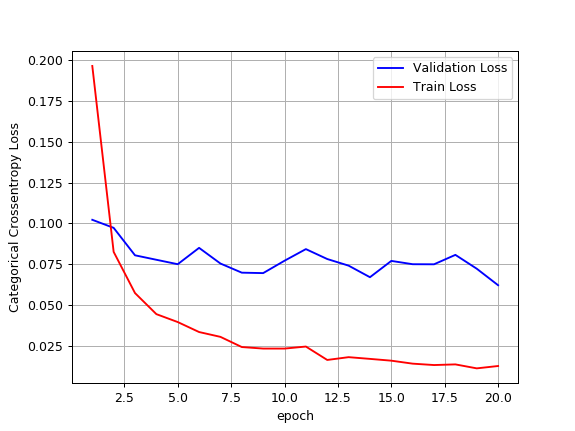

<IPython.core.display.Javascript object>


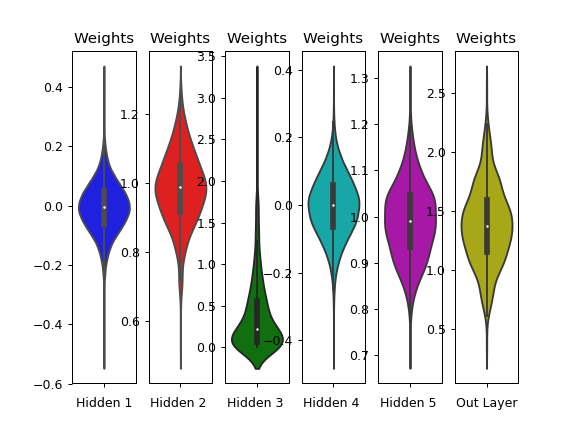

In [28]:
model5_batch = Sequential()
model5_batch.add(Dense(650, activation='relu', 
                    input_shape=(input_dim,), kernel_initializer='he_normal'))
model5_batch.add(BatchNormalization())
model5_batch.add(Dense(500, activation='relu', kernel_initializer='he_normal'))
model5_batch.add(BatchNormalization())
model5_batch.add(Dense(350, activation='relu', kernel_initializer='he_normal'))
model5_batch.add(BatchNormalization())
model5_batch.add(Dense(200, activation='relu', kernel_initializer='he_normal'))
model5_batch.add(BatchNormalization())
model5_batch.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model5_batch.add(BatchNormalization())
model5_batch.add(Dense(output_dim, activation='softmax'))

print(model5_batch.summary())

history = training(model=model5_batch)
train_test_epoch_plot(model=model5_batch, history=history)
weight_plot(model=model5_batch,layeres=5)

# 5-Layered MLP with Batch-Normalization and dropout on hidden Layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 650)               510250    
_________________________________________________________________
batch_normalization_21 (Batc (None, 650)               2600      
_________________________________________________________________
dropout_6 (Dropout)          (None, 650)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 500)               325500    
_________________________________________________________________
batch_normalization_22 (Batc (None, 500)               2000      
_________________________________________________________________
dropout_7 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 350)               175350    
__________

<IPython.core.display.Javascript object>


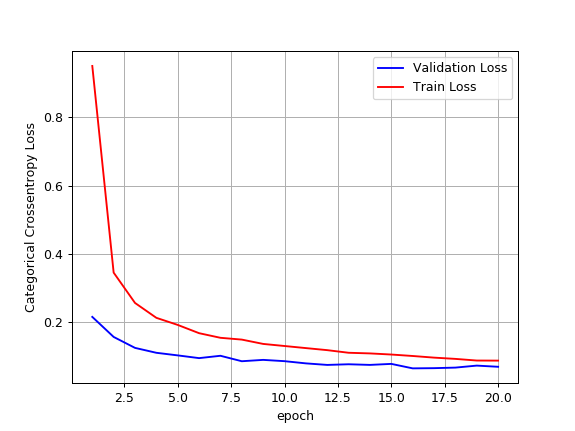

<IPython.core.display.Javascript object>


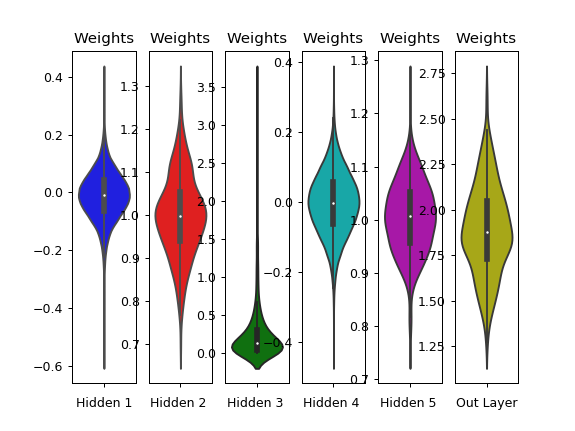

In [30]:
model5_batch_drop = Sequential()
model5_batch_drop.add(Dense(650, activation='relu', 
                    input_shape=(input_dim,), kernel_initializer='he_normal'))
model5_batch_drop.add(BatchNormalization())
model5_batch_drop.add(Dropout(0.5))

model5_batch_drop.add(Dense(500, activation='relu', kernel_initializer='he_normal'))
model5_batch_drop.add(BatchNormalization())
model5_batch_drop.add(Dropout(0.5))

model5_batch_drop.add(Dense(350, activation='relu', kernel_initializer='he_normal'))
model5_batch_drop.add(BatchNormalization())
model5_batch_drop.add(Dropout(0.5))

model5_batch_drop.add(Dense(200, activation='relu', kernel_initializer='he_normal'))
model5_batch_drop.add(BatchNormalization())
model5_batch_drop.add(Dropout(0.5))

model5_batch_drop.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model5_batch_drop.add(BatchNormalization())
model5_batch_drop.add(Dropout(0.5))

model5_batch_drop.add(Dense(output_dim, activation='softmax'))

print(model5_batch_drop.summary())

history = training(model=model5_batch_drop)
train_test_epoch_plot(model=model5_batch_drop, history=history)
weight_plot(model=model5_batch_drop,layeres=5)

# Summary Table

In [33]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Algorithms","Total params", "Accuracy","Loss-epcoh plot"]

x.add_row(["2 layerd mlp(784-512-128-10)","468,874", "98.22%","Divergent"])
x.add_row(["2 layerd+batch_normal","471,434", "98.11%","Divergent"])
x.add_row(["2 layerd+batch_normal+dopout","470,154", "98.29%","Convergent"])
x.add_row(["3 layerd mlp(784-550-350-150-10)","678,760", "98.19%","Divergent"])
x.add_row(["3 layerd+batch_normal","680,860", "97.95%","Divergent"])
x.add_row(["3 layerd+batch_normal+dopout","680,860", "98.13%","Convergent"])
x.add_row(["5 layerd mlp(784-650-500-350-200-50-10)","1,091,860", "98.05%","Divergent"])
x.add_row(["5 layerd+batch_normal","1,095,360", "98.47%","Divergent"])
x.add_row(["5 layerd+batch_normal+dopout","1,095,360", "98.39%","Convergent"])
print(x)

+-----------------------------------------+--------------+----------+-----------------+
|                Algorithms               | Total params | Accuracy | Loss-epcoh plot |
+-----------------------------------------+--------------+----------+-----------------+
|       2 layerd mlp(784-512-128-10)      |   468,874    |  98.22%  |    Divergent    |
|          2 layerd+batch_normal          |   471,434    |  98.11%  |    Divergent    |
|       2 layerd+batch_normal+dopout      |   470,154    |  98.29%  |    Convergent   |
|     3 layerd mlp(784-550-350-150-10)    |   678,760    |  98.19%  |    Divergent    |
|          3 layerd+batch_normal          |   680,860    |  97.95%  |    Divergent    |
|       3 layerd+batch_normal+dopout      |   680,860    |  98.13%  |    Convergent   |
| 5 layerd mlp(784-650-500-350-200-50-10) |  1,091,860   |  98.05%  |    Divergent    |
|          5 layerd+batch_normal          |  1,095,360   |  98.47%  |    Divergent    |
|       5 layerd+batch_normal+do

# Conclusion

1) With 5 hidden layerd i am gettting slightly higer accuracy(98.39%).

2) Becuase of mnist dataset is very simple dataset so accuracy for 2,3,5 hidden layer network we are getting near accuracy .

3) Normal nn and with batch normalization we are able to see from loss vs epoch plot that train and test loss are diverging  , but after adding the dropout with dopout rate 0.5 we are able to see that plots are converging .

4) we can able to see from weight plots Gaussian curves how it was expeceted.